### Classification

#### Libraries

In [1]:
# Load Libraries

import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings 

# Pre-processing, model selection and tuning techniques 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Algorithms - Unsupervised Learning
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Algorithms - Supervised Learnin - classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Other classifiers if you would like to explore (optional) 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from imblearn.over_sampling import ADASYN

# XAI
import lime
import lime.lime_tabular
import shap

pd.set_option('display.max_columns', 100)
pd.set_option("display.precision", 2)

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Pre-processing

In [2]:
#header titles
header_titles = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'tar_var']

In [3]:
#Load training Data as adult_data

adult_data = pd.read_csv("./data/classification/adult.data",header= None,names=header_titles)
print(adult_data.shape)
adult_data.head(15)


(32561, 15)


age          workclass  fnlwgt      education  education_num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acdm             12   
14   40            Private  121772      Assoc-voc             11   

            marital_status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
5       Married-civ-spouse     Exec-managerial            Wife   
6    Married-spouse-absent       Other-service   Not-in-family   
7       Married-civ-spouse     Exec-managerial         Husband   
8            Never-married      Prof-specialty   Not-in-family   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse     Exec-managerial         Husband   
11      Married-civ-spouse      Prof-specialty         Husband   
12           Never-married        Adm-clerical       Own-child   
13           Never-married               Sales   Not-in-family   
14      Married-civ-spouse        Craft-repair         Husband   

                   race      sex  capital_gain  capital_loss  hours_per_week  \
0                 White     Male          2174             0              40   
1                 White     Male             0             0              13   
2                 White     Male             0             0              40   
3                 Black     Male             0             0              40   
4                 Black   Female             0             0              40   
5                 White   Female             0             0              40   
6                 Black   Female             0             0              16   
7                 White     Male             0             0              45   
8                 White   Female         14084             0              50   
9                 White     Male          5178             0              40   
10                Black     Male             0             0              80   
11   Asian-Pac-Islander     Male             0             0              40   
12                White   Female             0             0              30   
13                Black     Male             0             0              50   
14   Asian-Pac-Islander     Male             0             0              40   

    native_country tar_var  
0    United-States   <=50K  
1    United-States   <=50K  
2    United-States   <=50K  
3    United-States   <=50K  
4             Cuba   <=50K  
5    United-States   <=50K  
6          Jamaica   <=50K  
7    United-States    >50K  
8    United-States    >50K  
9    United-States    >50K  
10   United-States    >50K  
11           India    >50K  
12   United-States   <=50K  
13   United-States   <=50K  
14               ?    >50K

In [4]:
# Get the data types for data

adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  tar_var         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#drop duplicates for adult_data

adult_data.drop_duplicates(inplace=True)
print(adult_data.shape)

(32537, 15)


In [6]:
#checking adult_data statistics
adult_data.describe()

age    fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.00  3.25e+04       32537.00      32537.00      32537.00   
mean      38.59  1.90e+05          10.08       1078.44         87.37   
std       13.64  1.06e+05           2.57       7387.96        403.10   
min       17.00  1.23e+04           1.00          0.00          0.00   
25%       28.00  1.18e+05           9.00          0.00          0.00   
50%       37.00  1.78e+05          10.00          0.00          0.00   
75%       48.00  2.37e+05          12.00          0.00          0.00   
max       90.00  1.48e+06          16.00      99999.00       4356.00   

       hours_per_week  
count        32537.00  
mean            40.44  
std             12.35  
min              1.00  
25%             40.00  
50%             40.00  
75%             45.00  
max             99.00

In [7]:
# We see there is a max age of 90 and hours max 99 , further investigation is needed

adult_data[adult_data['age'] >= 90]

age          workclass  fnlwgt      education  education_num  \
222     90            Private   51744        HS-grad              9   
1040    90            Private  137018        HS-grad              9   
1935    90            Private  221832      Bachelors             13   
2303    90            Private   52386   Some-college             10   
2891    90            Private  171956   Some-college             10   
4070    90            Private  313986           11th              7   
4109    90                  ?  256514      Bachelors             13   
5272    90            Private  141758            9th              5   
5370    90          Local-gov  227796        Masters             14   
5406    90            Private   51744        Masters             14   
6232    90   Self-emp-not-inc  155981      Bachelors             13   
6624    90            Private  313986           11th              7   
8806    90            Private   87372    Prof-school             15   
8963    90                  ?   77053        HS-grad              9   
8973    90            Private   46786      Bachelors             13   
10210   90   Self-emp-not-inc  282095   Some-college             10   
10545   90            Private  175491        HS-grad              9   
11512   90            Private   87285        HS-grad              9   
11731   90                  ?   39824        HS-grad              9   
11996   90            Private   40388      Bachelors             13   
12451   90                  ?  225063   Some-college             10   
12975   90            Private  250832           10th              6   
14159   90          Local-gov  187749     Assoc-acdm             12   
15356   90            Private   90523        HS-grad              9   
15892   90            Private   88991      Bachelors             13   
18277   90            Private  311184      Bachelors             13   
18413   90            Private  313749      Bachelors             13   
18725   90          Local-gov  153602        HS-grad              9   
18832   90            Private  115306        Masters             14   
19212   90            Private  139660   Some-college             10   
19489   90            Private   84553        HS-grad              9   
19747   90            Private  226968        7th-8th              4   
20610   90            Private  206667        Masters             14   
22220   90            Private   52386      Bachelors             13   
24043   90   Self-emp-not-inc   82628        HS-grad              9   
24238   90                  ?  166343        1st-4th              2   
25303   90                  ?  175444        7th-8th              4   
28463   90        Federal-gov  195433        HS-grad              9   
31030   90            Private   47929        HS-grad              9   
31696   90                  ?  313986        HS-grad              9   
32277   90            Private  313749        HS-grad              9   
32367   90          Local-gov  214594        7th-8th              4   

            marital_status          occupation     relationship  \
222          Never-married       Other-service    Not-in-family   
1040         Never-married       Other-service    Not-in-family   
1935    Married-civ-spouse     Exec-managerial          Husband   
2303         Never-married       Other-service    Not-in-family   
2891             Separated        Adm-clerical        Own-child   
4070         Never-married   Handlers-cleaners        Own-child   
4109               Widowed                   ?   Other-relative   
5272         Never-married        Adm-clerical    Not-in-family   
5370    Married-civ-spouse     Exec-managerial          Husband   
5406         Never-married     Exec-managerial    Not-in-family   
6232    Married-civ-spouse      Prof-specialty          Husband   
6624    Married-civ-spouse        Craft-repair          Husband   
8806    Married-civ-spouse      Prof-specialty          Husband   
8963           

In [8]:
# We notice there are cases with columns filled with ?. We replace them with na

adult_data.replace(to_replace ='[ ]*\?', value = np.nan, regex = True,
inplace=True)

adult_data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
tar_var              0
dtype: int64

In [9]:
#replace NAs with most frequent values. Not the best way but for practicallity 

adult_data.loc[:, ['workclass', 'occupation', 'native_country']] = adult_data[['workclass', 'occupation', 'native_country']].fillna(adult_data[['workclass', 'occupation', 'native_country']].mode().iloc[0])
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
tar_var           0
dtype: int64

In [10]:
#And drop rows with age >= 85 because we consider them outliers 

# Drop rows where age is greater than or equal to 85
adult_data.drop(adult_data[adult_data['age'] >= 85].index, inplace=True)
print(adult_data.shape)

(32487, 15)


In [11]:
# Drop education and relationship columns since we have education num and marital status

adult_data.drop(columns=['education', 'relationship'], inplace=True)
adult_data.head()

age          workclass  fnlwgt  education_num       marital_status  \
0   39          State-gov   77516             13        Never-married   
1   50   Self-emp-not-inc   83311             13   Married-civ-spouse   
2   38            Private  215646              9             Divorced   
3   53            Private  234721              7   Married-civ-spouse   
4   28            Private  338409             13   Married-civ-spouse   

           occupation    race      sex  capital_gain  capital_loss  \
0        Adm-clerical   White     Male          2174             0   
1     Exec-managerial   White     Male             0             0   
2   Handlers-cleaners   White     Male             0             0   
3   Handlers-cleaners   Black     Male             0             0   
4      Prof-specialty   Black   Female             0             0   

   hours_per_week  native_country tar_var  
0              40   United-States   <=50K  
1              13   United-States   <=50K  
2              40   United-States   <=50K  
3              40   United-States   <=50K  
4              40            Cuba   <=50K

In [12]:
#Check the Workclass 
print(adult_data['workclass'].unique())
adult_data['workclass'].value_counts()


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


workclass
Private             24470
Self-emp-not-inc     2534
Local-gov            2089
State-gov            1298
Self-emp-inc         1116
Federal-gov           959
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
#We notice we can combine self employed and gov employed to avoid having multiple columns

# Define new categories
self_emp = [' Self-emp-not-inc', ' Self-emp-inc']
gov_emp = [' Local-gov', ' State-gov', ' Federal-gov']

# Replace values in 'workclass' column
adult_data['workclass'].replace(self_emp, value='Self_emp', inplace=True)
adult_data['workclass'].replace(gov_emp, value='Gov_emp', inplace=True)

# Check value counts after replacement
print(adult_data['workclass'].value_counts())


workclass
 Private         24470
Gov_emp           4346
Self_emp          3650
 Without-pay        14
 Never-worked        7
Name: count, dtype: int64


In [14]:
print(adult_data.shape)
adult_data.head()

(32487, 13)


age workclass  fnlwgt  education_num       marital_status  \
0   39   Gov_emp   77516             13        Never-married   
1   50  Self_emp   83311             13   Married-civ-spouse   
2   38   Private  215646              9             Divorced   
3   53   Private  234721              7   Married-civ-spouse   
4   28   Private  338409             13   Married-civ-spouse   

           occupation    race      sex  capital_gain  capital_loss  \
0        Adm-clerical   White     Male          2174             0   
1     Exec-managerial   White     Male             0             0   
2   Handlers-cleaners   White     Male             0             0   
3   Handlers-cleaners   Black     Male             0             0   
4      Prof-specialty   Black   Female             0             0   

   hours_per_week  native_country tar_var  
0              40   United-States   <=50K  
1              13   United-States   <=50K  
2              40   United-States   <=50K  
3              40   United-States   <=50K  
4              40            Cuba   <=50K

In [15]:
# Repeat for adult_test

In [16]:
#Load test Data as adult_test

adult_test = pd.read_csv("./data/classification/adult.data",header= None,names=header_titles)
print(adult_test.shape)
adult_test.head()

(32561, 15)


age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country tar_var  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [17]:
# Get the data types for test

adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  tar_var         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
#drop duplicates for adult_test

adult_test.drop_duplicates(inplace=True)
print(adult_test.shape)

(32537, 15)


In [19]:
#checking adult_test statistics
adult_test.describe()

age    fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.00  3.25e+04       32537.00      32537.00      32537.00   
mean      38.59  1.90e+05          10.08       1078.44         87.37   
std       13.64  1.06e+05           2.57       7387.96        403.10   
min       17.00  1.23e+04           1.00          0.00          0.00   
25%       28.00  1.18e+05           9.00          0.00          0.00   
50%       37.00  1.78e+05          10.00          0.00          0.00   
75%       48.00  2.37e+05          12.00          0.00          0.00   
max       90.00  1.48e+06          16.00      99999.00       4356.00   

       hours_per_week  
count        32537.00  
mean            40.44  
std             12.35  
min              1.00  
25%             40.00  
50%             40.00  
75%             45.00  
max             99.00

In [20]:
# We notice there are cases with columns filled with ?. We replace them with na

adult_test.replace(to_replace ='[ ]*\?', value = np.nan, regex = True,
inplace=True)

adult_test.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
tar_var              0
dtype: int64

In [21]:
#replace NAs with most frequent values. Not the best way but for practicallity 

adult_test.loc[:, ['workclass', 'occupation', 'native_country']] = adult_test[['workclass', 'occupation', 'native_country']].fillna(adult_test[['workclass', 'occupation', 'native_country']].mode().iloc[0])
adult_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
tar_var           0
dtype: int64

In [22]:
#And drop rows with age >= 85 because we consider them outliers 

# Drop rows where age is greater than or equal to 85
adult_test.drop(adult_test[adult_test['age'] >= 85].index, inplace=True)
print(adult_test.shape)

(32487, 15)


In [23]:
# Drop education and relationship columns since we have education num and marital status

adult_test.drop(columns=['education', 'relationship'], inplace=True)
adult_test.head()

age          workclass  fnlwgt  education_num       marital_status  \
0   39          State-gov   77516             13        Never-married   
1   50   Self-emp-not-inc   83311             13   Married-civ-spouse   
2   38            Private  215646              9             Divorced   
3   53            Private  234721              7   Married-civ-spouse   
4   28            Private  338409             13   Married-civ-spouse   

           occupation    race      sex  capital_gain  capital_loss  \
0        Adm-clerical   White     Male          2174             0   
1     Exec-managerial   White     Male             0             0   
2   Handlers-cleaners   White     Male             0             0   
3   Handlers-cleaners   Black     Male             0             0   
4      Prof-specialty   Black   Female             0             0   

   hours_per_week  native_country tar_var  
0              40   United-States   <=50K  
1              13   United-States   <=50K  
2              40   United-States   <=50K  
3              40   United-States   <=50K  
4              40            Cuba   <=50K

In [24]:
#As we did with adult_data we repeat the process for test too.

# Define new categories
self_emp = [' Self-emp-not-inc', ' Self-emp-inc']
gov_emp = [' Local-gov', ' State-gov', ' Federal-gov']

# Replace values in 'workclass' column
adult_test['workclass'].replace(self_emp, value='Self_emp', inplace=True)
adult_test['workclass'].replace(gov_emp, value='Gov_emp', inplace=True)

# Check value counts after replacement
print(adult_data['workclass'].value_counts())

workclass
 Private         24470
Gov_emp           4346
Self_emp          3650
 Without-pay        14
 Never-worked        7
Name: count, dtype: int64


In [25]:
print(adult_test.shape)
adult_test.head()

(32487, 13)


age workclass  fnlwgt  education_num       marital_status  \
0   39   Gov_emp   77516             13        Never-married   
1   50  Self_emp   83311             13   Married-civ-spouse   
2   38   Private  215646              9             Divorced   
3   53   Private  234721              7   Married-civ-spouse   
4   28   Private  338409             13   Married-civ-spouse   

           occupation    race      sex  capital_gain  capital_loss  \
0        Adm-clerical   White     Male          2174             0   
1     Exec-managerial   White     Male             0             0   
2   Handlers-cleaners   White     Male             0             0   
3   Handlers-cleaners   Black     Male             0             0   
4      Prof-specialty   Black   Female             0             0   

   hours_per_week  native_country tar_var  
0              40   United-States   <=50K  
1              13   United-States   <=50K  
2              40   United-States   <=50K  
3              40   United-States   <=50K  
4              40            Cuba   <=50K

In [26]:
print(adult_data['native_country'].unique())
adult_data['native_country'].value_counts()


[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


native_country
United-States                 29691
Mexico                          639
Philippines                     197
Germany                         137
Canada                          121
Puerto-Rico                     113
El-Salvador                     106
India                           100
Cuba                             95
England                          89
Jamaica                          81
South                            79
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           59
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

Frequency of Countries (in percentage):
                 native_country  country_freq
0                 United-States        91.39%
1                        Mexico         1.97%
2                   Philippines         0.61%
3                       Germany         0.42%
4                        Canada         0.37%
5                   Puerto-Rico         0.35%
6                   El-Salvador         0.33%
7                         India         0.31%
8                          Cuba         0.29%
9                       England         0.27%
10                      Jamaica         0.25%
11                        South         0.24%
12                        China         0.23%
13                        Italy         0.22%
14           Dominican-Republic         0.22%
15                      Vietnam         0.21%
16                        Japan         0.19%
17                    Guatemala         0.19%
18                       Poland         0.18%
19                     Columbia         

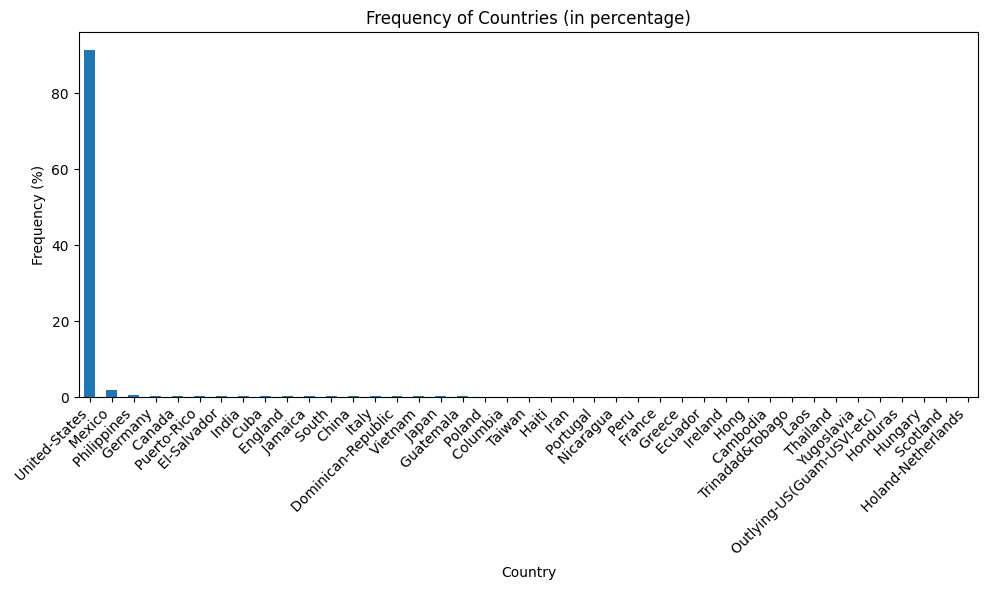

In [27]:
#Before applying OHE , we calculate the frequency to avoid increasing the featues since the countries are too many

# Calculate the frequency of each country
country_frequency_data = adult_data['native_country'].value_counts(normalize=True) * 100

# Create a DataFrame with countries and their percentages
country_percentage_data_df = pd.DataFrame({'native_country': country_frequency_data.index, 'country_freq': country_frequency_data.values})

# Set display format to show percentages without scientific notation
pd.options.display.float_format = '{:.2f}%'.format

# Display the DataFrame
print("Frequency of Countries (in percentage):")
print(country_percentage_data_df)

# Plot the frequency of each country
plt.figure(figsize=(10, 6))
country_frequency_data.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Countries (in percentage)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [28]:
#Merge the new frequency df with the adult_data

adult_data = pd.merge(adult_data, country_percentage_data_df, on='native_country', how='left')


In [29]:
# Drop the 'native_country' column
adult_data.drop('native_country', axis=1, inplace=True)

#sanity check
adult_data.head()

age workclass  fnlwgt  education_num       marital_status  \
0   39   Gov_emp   77516             13        Never-married   
1   50  Self_emp   83311             13   Married-civ-spouse   
2   38   Private  215646              9             Divorced   
3   53   Private  234721              7   Married-civ-spouse   
4   28   Private  338409             13   Married-civ-spouse   

           occupation    race      sex  capital_gain  capital_loss  \
0        Adm-clerical   White     Male          2174             0   
1     Exec-managerial   White     Male             0             0   
2   Handlers-cleaners   White     Male             0             0   
3   Handlers-cleaners   Black     Male             0             0   
4      Prof-specialty   Black   Female             0             0   

   hours_per_week tar_var  country_freq  
0              40   <=50K        91.39%  
1              13   <=50K        91.39%  
2              40   <=50K        91.39%  
3              40   <=50K        91.39%  
4              40   <=50K         0.29%

Frequency of Countries (in percentage):
                 native_country  country_freq
0                 United-States        91.39%
1                        Mexico         1.97%
2                   Philippines         0.61%
3                       Germany         0.42%
4                        Canada         0.37%
5                   Puerto-Rico         0.35%
6                   El-Salvador         0.33%
7                         India         0.31%
8                          Cuba         0.29%
9                       England         0.27%
10                      Jamaica         0.25%
11                        South         0.24%
12                        China         0.23%
13                        Italy         0.22%
14           Dominican-Republic         0.22%
15                      Vietnam         0.21%
16                        Japan         0.19%
17                    Guatemala         0.19%
18                       Poland         0.18%
19                     Columbia         

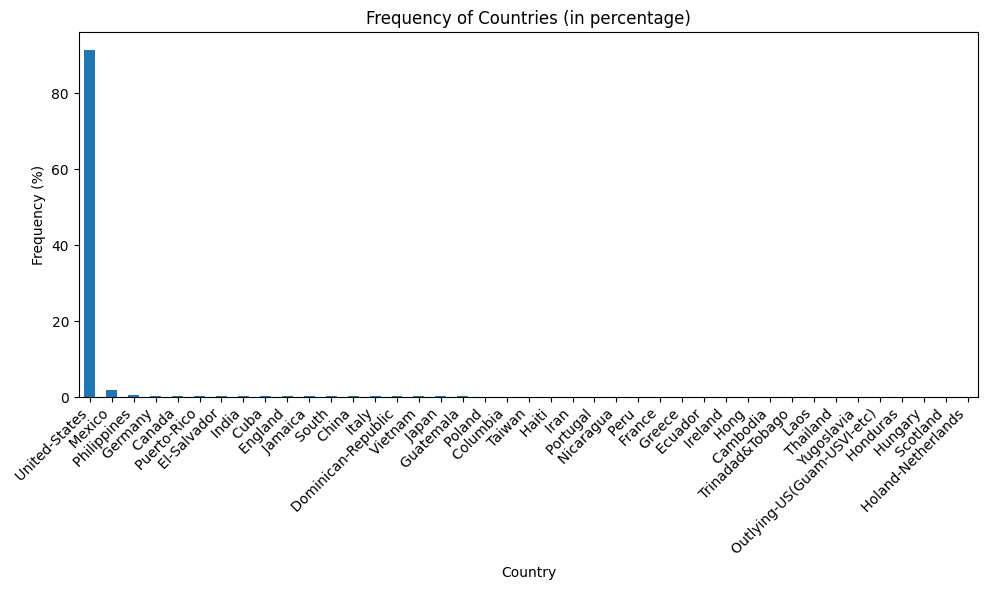

In [30]:
#Repeat for test df

# Calculate the frequency of each country
country_frequency_test = adult_test['native_country'].value_counts(normalize=True) * 100

# Create a DataFrame with countries and their percentages
country_percentage_test_df = pd.DataFrame({'native_country': country_frequency_test.index, 'country_freq': country_frequency_test.values})

# Set display format to show percentages without scientific notation
pd.options.display.float_format = '{:.2f}%'.format

# Display the DataFrame
print("Frequency of Countries (in percentage):")
print(country_percentage_test_df)

# Plot the frequency of each country
plt.figure(figsize=(10, 6))
country_frequency_test.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Countries (in percentage)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [31]:
#Merge the new frequency df with the adult_test

adult_test = pd.merge(adult_test, country_percentage_test_df, on='native_country', how='left')

# Drop the 'native_country' column
adult_test.drop('native_country', axis=1, inplace=True)

#sanity check
adult_test.head()

age workclass  fnlwgt  education_num       marital_status  \
0   39   Gov_emp   77516             13        Never-married   
1   50  Self_emp   83311             13   Married-civ-spouse   
2   38   Private  215646              9             Divorced   
3   53   Private  234721              7   Married-civ-spouse   
4   28   Private  338409             13   Married-civ-spouse   

           occupation    race      sex  capital_gain  capital_loss  \
0        Adm-clerical   White     Male          2174             0   
1     Exec-managerial   White     Male             0             0   
2   Handlers-cleaners   White     Male             0             0   
3   Handlers-cleaners   Black     Male             0             0   
4      Prof-specialty   Black   Female             0             0   

   hours_per_week tar_var  country_freq  
0              40   <=50K        91.39%  
1              13   <=50K        91.39%  
2              40   <=50K        91.39%  
3              40   <=50K        91.39%  
4              40   <=50K         0.29%

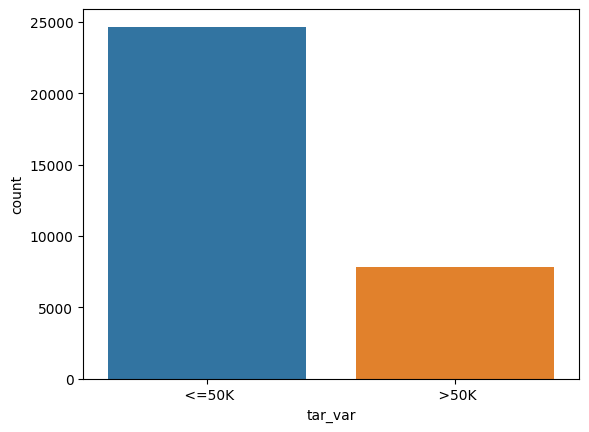

In [32]:
#Value_counts for target variable in data

adult_data.value_counts(subset='tar_var')
sns.countplot(x='tar_var',hue='tar_var',data=adult_data);

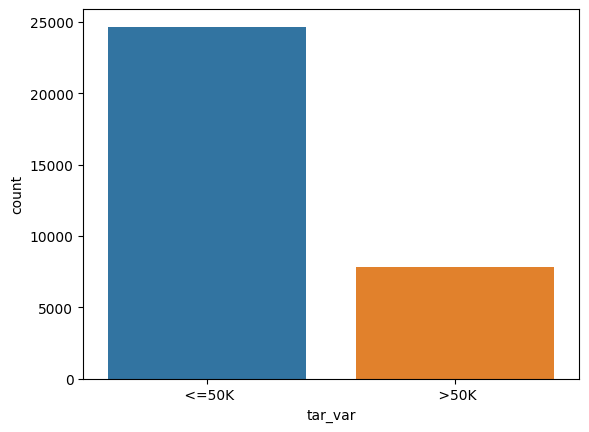

In [33]:
#Value_counts for target variable in test

adult_test.value_counts(subset='tar_var')
sns.countplot(x='tar_var',hue='tar_var',data=adult_test);

In [34]:
#Find the target variable for Adult_data, split to input feature matrix and class vector, and check for imbalances.

X_train = adult_data.drop('tar_var',axis=1)
y_train = adult_data['tar_var']

print ("X_train dimensions: ", X_train.shape)
print ("y_train dimensions: ", y_train.shape)


X_train dimensions:  (32487, 12)
y_train dimensions:  (32487,)


In [35]:
#Find the target variable for Adult_test, split to input feature matrix and class vector, and check for imbalances.

X_test = adult_test.drop('tar_var',axis=1)
y_test = adult_test['tar_var']

print ("X_test dimensions: ", X_test.shape)
print ("y_test dimensions: ", y_test.shape)

X_test dimensions:  (32487, 12)
y_test dimensions:  (32487,)


In [36]:
#Convert the categorical values within y into numbers using the LabelEncoder()

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

print(y_train)
print(y_test)

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 1]


In [37]:
#Convert Categorical features with OHE

X_train.dtypes

age                 int64
workclass          object
fnlwgt              int64
education_num       int64
marital_status     object
occupation         object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
country_freq      float64
dtype: object

In [38]:
#First with X_train

X_train_ohe = X_train[['workclass', 'marital_status','occupation','race','sex']]
X_train_ohe = pd.get_dummies(X_train_ohe, dtype=int)

X_train = X_train.drop(['workclass', 'marital_status','occupation','race','sex'], axis = 1)
X_train = X_train.join(X_train_ohe)

X_train.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   country_freq  workclass_ Never-worked  workclass_ Private  \
0        91.39%                        0                   0   
1        91.39%                        0                   0   
2        91.39%                        0                   1   
3        91.39%                        0                   1   
4         0.29%                        0                   1   

   workclass_ Without-pay  workclass_Gov_emp  workclass_Self_emp  \
0                       0                  1                   0   
1                       0                  0                   1   
2                       0                  0                   0   
3                       0                  0                   0   
4                       0                  0                   0   

   marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                         0                                  0   
1                         0                                  0   
2                         1                                  0   
3                         0                                  0   
4                         0                                  0   

   marital_status_ Married-civ-spouse  marital_status_ Married-spouse-absent  \
0                                   0                                      0   
1                                   1                                      0   
2                                   0                                      0   
3                                   1                                      0   
4                                   1                                      0   

   marital_status_ Never-married  marital_status_ Separated  \
0                              1                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   marital_status_ Widowed  occupation_ Adm-clerical  \
0                        0                         1   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   occupation_ Armed-Forces  occupation_ Craft-repair  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   occupation_ Exec-managerial  occupation_ Farming-fishing  \
0                            0                            0   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              1                              0   
4                              0                              0   

   occupation_ Other-servic

In [39]:
#And with X_test

X_test_ohe = X_test[['workclass', 'marital_status','occupation','race','sex']]
X_test_ohe = pd.get_dummies(X_test_ohe, dtype=int)

X_test = X_test.drop(['workclass', 'marital_status','occupation','race','sex'], axis = 1)
X_test = X_test.join(X_train_ohe)

X_test.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   country_freq  workclass_ Never-worked  workclass_ Private  \
0        91.39%                        0                   0   
1        91.39%                        0                   0   
2        91.39%                        0                   1   
3        91.39%                        0                   1   
4         0.29%                        0                   1   

   workclass_ Without-pay  workclass_Gov_emp  workclass_Self_emp  \
0                       0                  1                   0   
1                       0                  0                   1   
2                       0                  0                   0   
3                       0                  0                   0   
4                       0                  0                   0   

   marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                         0                                  0   
1                         0                                  0   
2                         1                                  0   
3                         0                                  0   
4                         0                                  0   

   marital_status_ Married-civ-spouse  marital_status_ Married-spouse-absent  \
0                                   0                                      0   
1                                   1                                      0   
2                                   0                                      0   
3                                   1                                      0   
4                                   1                                      0   

   marital_status_ Never-married  marital_status_ Separated  \
0                              1                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   marital_status_ Widowed  occupation_ Adm-clerical  \
0                        0                         1   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   occupation_ Armed-Forces  occupation_ Craft-repair  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   occupation_ Exec-managerial  occupation_ Farming-fishing  \
0                            0                            0   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              1                              0   
4                              0                              0   

   occupation_ Other-servic

In [40]:
print(X_train.shape)
print(X_test.shape)

(32487, 40)
(32487, 40)


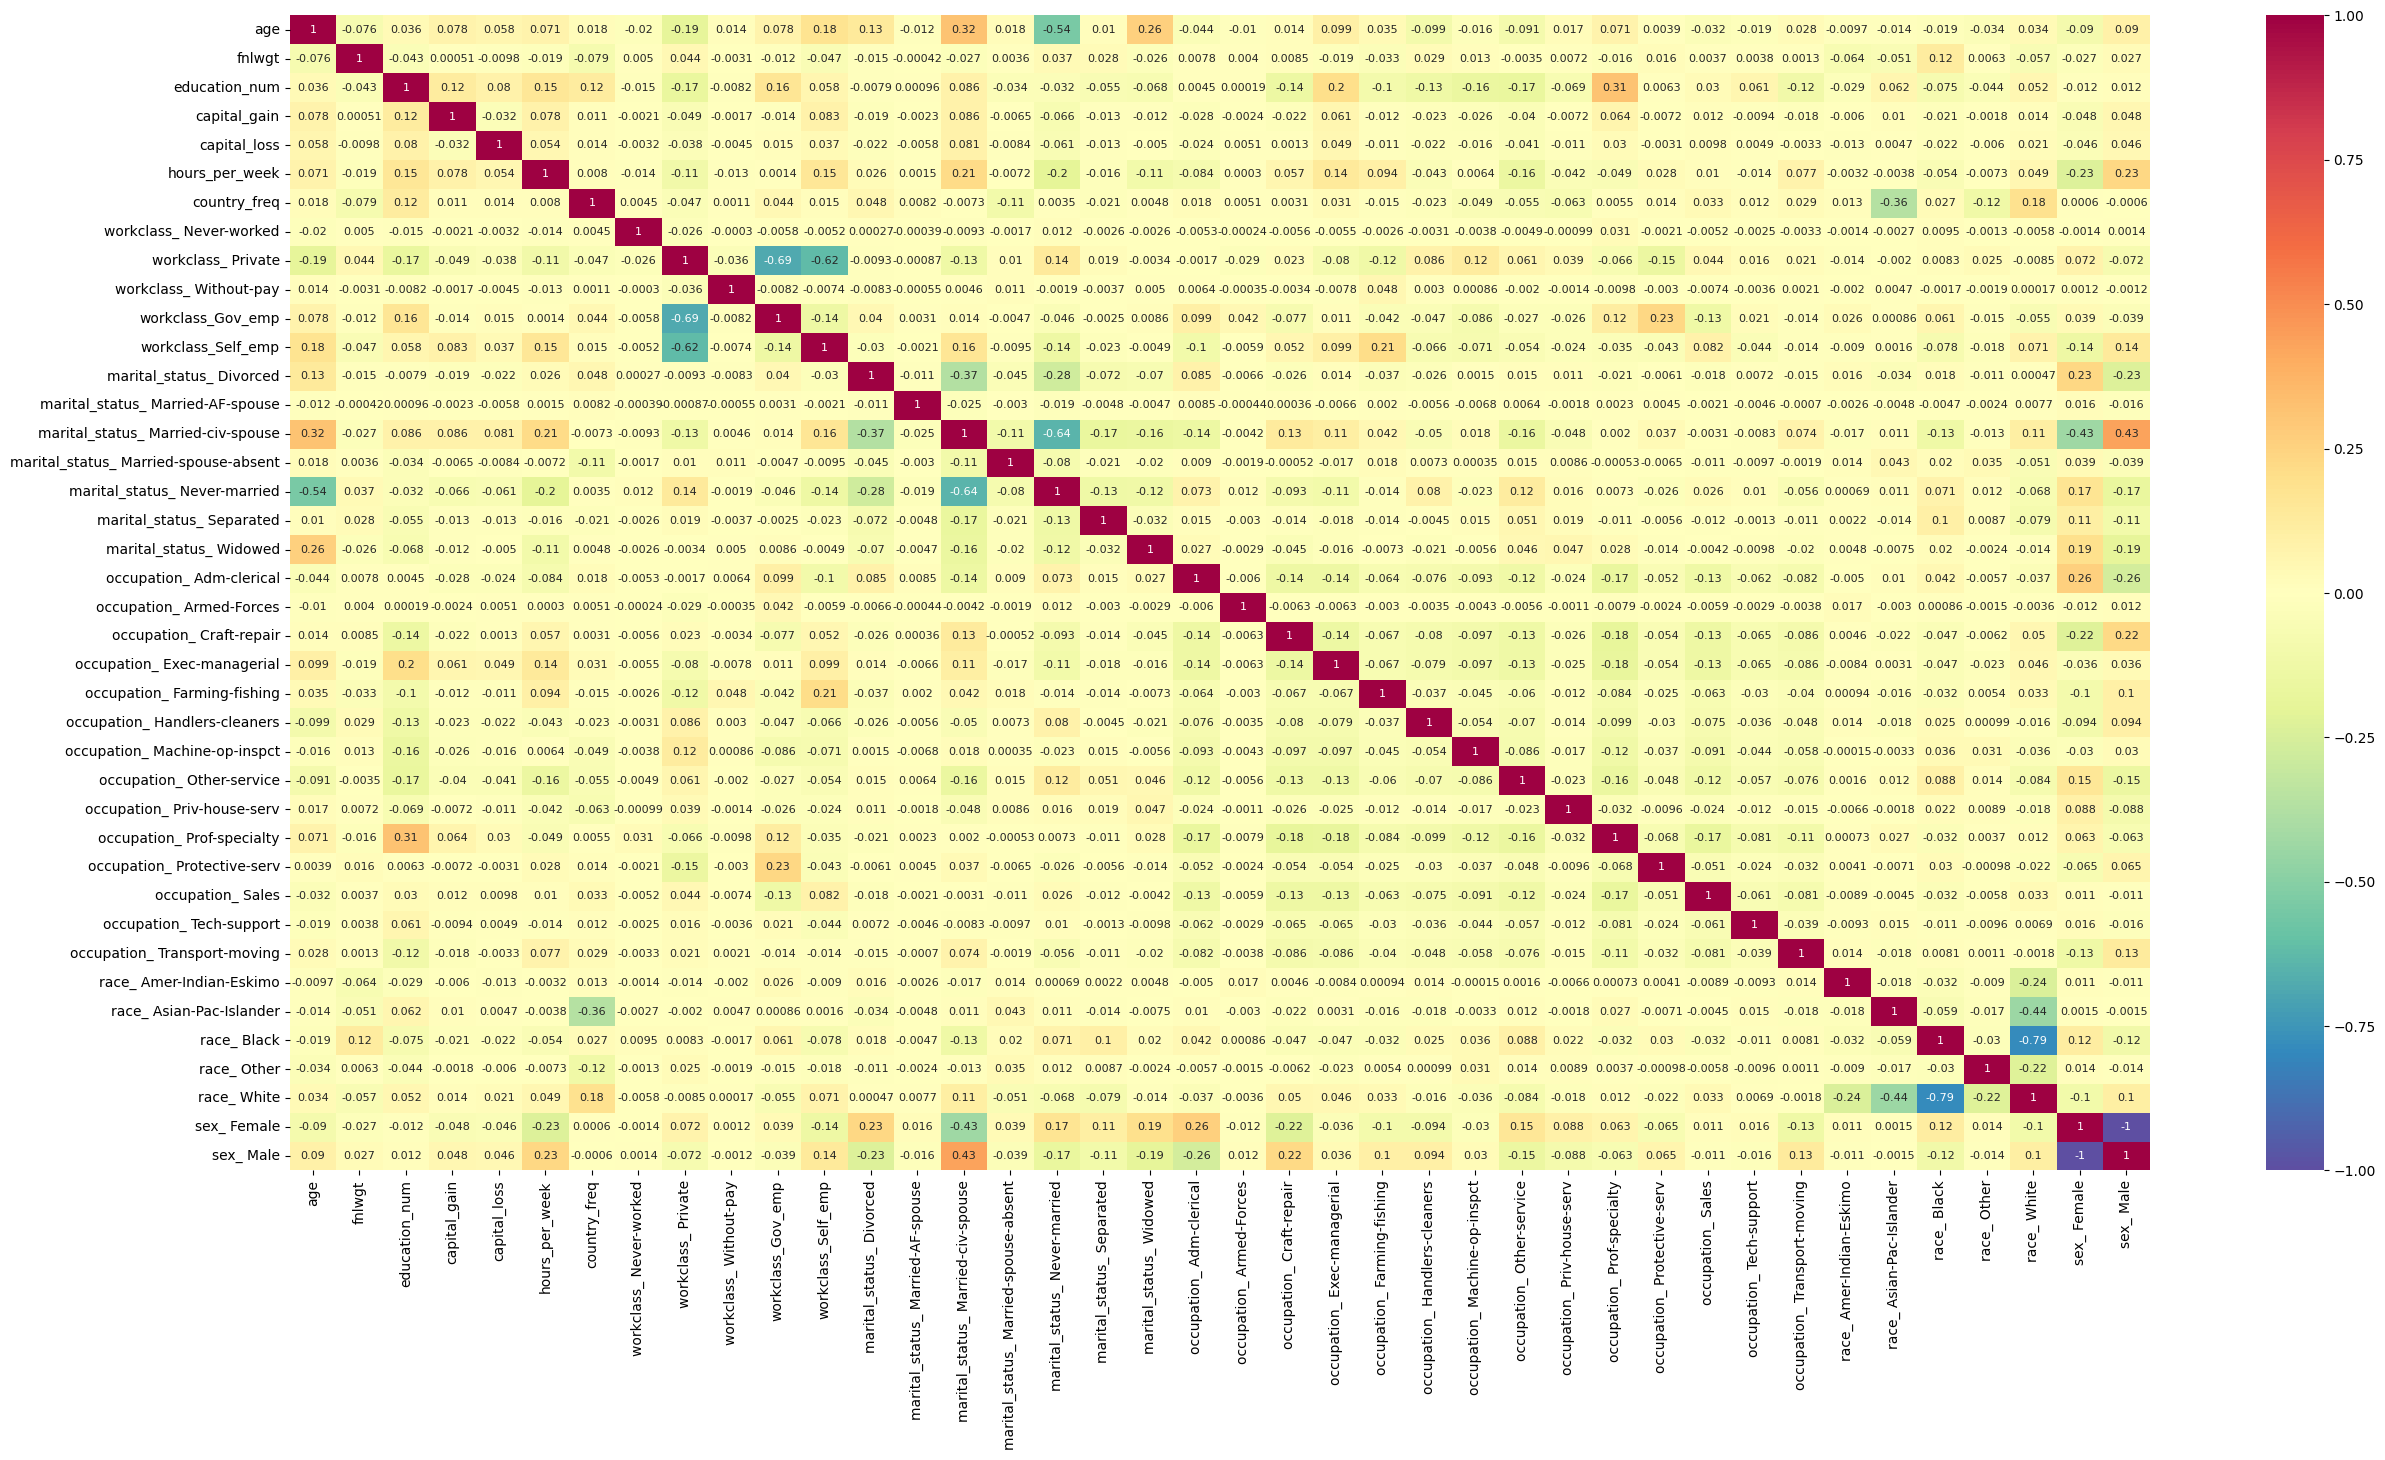

In [41]:
# Calculate the correlation matrix of X_train DataFrame using the .corr() function and 
# save it in a variable called 'corr_matrix'. Then pass the corr_matrix to the sns.heatmap() function for plotting. 
# Optional: you can use f, ax = plt.subplots(figsize=(12, 8))  
# Optional sns.heatmap arguments : annot=True,  annot_kws={'size': 8} and cmap="Spectral_r" 

corr_matrix = X_train.corr()

f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");

/var/folders/n7/f5p4_84514bgzwmq25zzpd2m0000gn/T/ipykernel_1609/3974839015.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


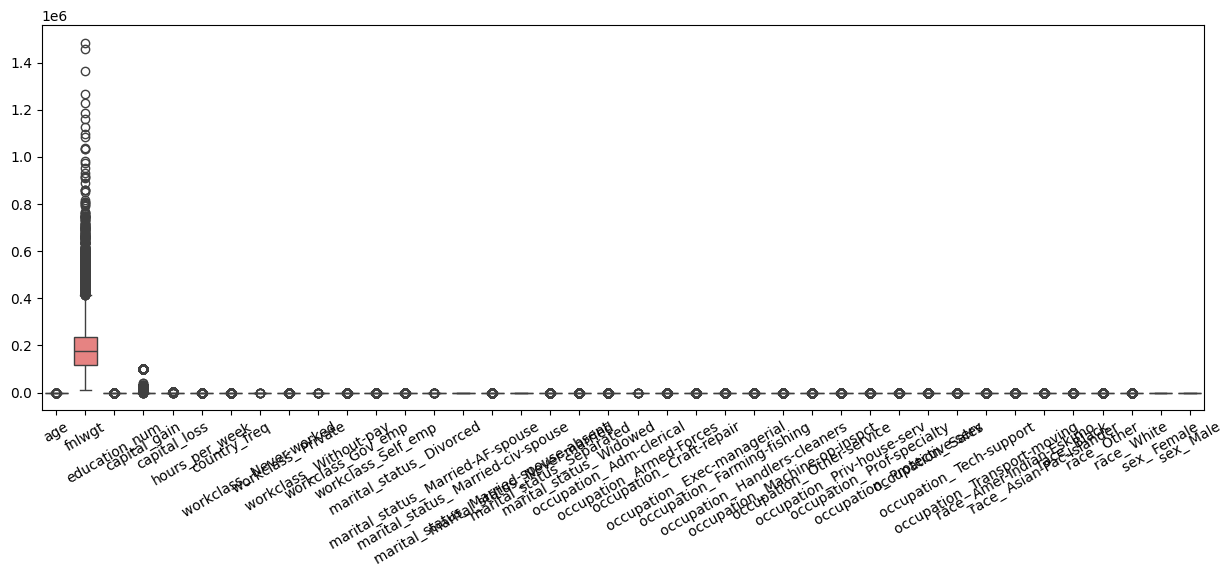

In [42]:
# Visualise the X_train data in a seaborn boxplot.


plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

In [43]:
#Balancing our Train set

# Instantiate the ADASYN object
ada = ADASYN(sampling_strategy='auto', random_state=0)

# Resampling our data 
X_train, y_train = ada.fit_resample(X_train, y_train)

In [44]:
# Convert resampled arrays back to DataFrame
X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train = pd.Series(y_train)

In [45]:
#Value_counts for target variable in data

y_train.value_counts()

1    24882
0    24656
Name: count, dtype: int64

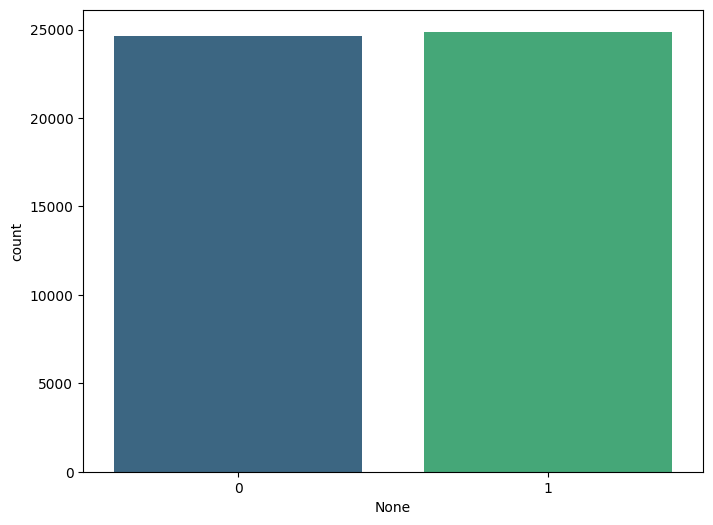

In [46]:
# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.show()

In [47]:
# Scaling

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

/var/folders/n7/f5p4_84514bgzwmq25zzpd2m0000gn/T/ipykernel_1609/352123781.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


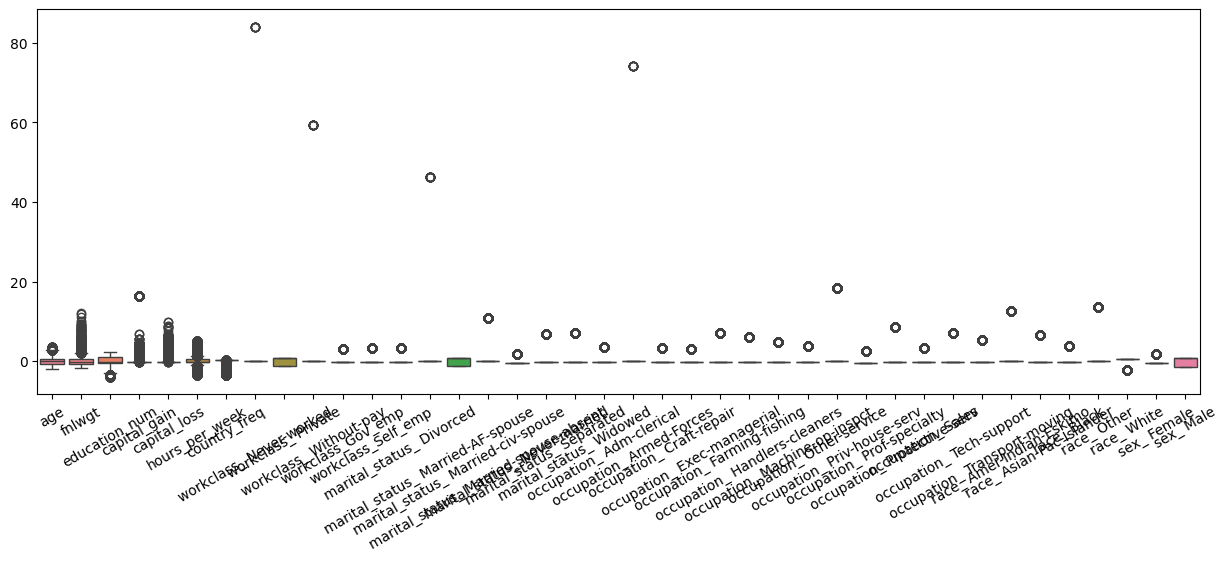

In [48]:
# Run once more the boxplot on the scaled X_train data

plt.figure(figsize=(15,5))
ax = sns.boxplot(data= X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

#### Benchmark Models

In [49]:
# Create an empty DataFrame to store and compare all evaluation results (performance metrics) across all classifiers 

clf_results = pd.DataFrame([])

In [50]:
#Benchmark KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_bench_knn = knn.predict(X_test)
print('KNN test set accuracy: ', metrics.accuracy_score(y_test, y_pred_bench_knn))
print(metrics.classification_report(y_test, y_pred_bench_knn))

KNN test set accuracy:  0.878536029796534
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     24656
           1       0.77      0.70      0.74      7831

    accuracy                           0.88     32487
   macro avg       0.84      0.82      0.83     32487
weighted avg       0.88      0.88      0.88     32487



In [51]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark KNN', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_bench_knn), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_bench_knn), 3)})])

clf_results

Model  Accuracy    F1
0  Benchmark KNN     0.88% 0.74%

In [52]:
#Benchmark RBF SVM 
rbf_svm = SVC(random_state=0)
rbf_svm.fit(X_train, y_train)
y_pred_rbf_svm = rbf_svm.predict(X_test)

print('Accuracy for RBF SVM is:', round(metrics.accuracy_score(y_test, y_pred_rbf_svm), 3))
print('\n', metrics.classification_report(y_test, y_pred_rbf_svm))

Accuracy for RBF SVM is: 0.858

               precision    recall  f1-score   support

           0       0.89      0.93      0.91     24656
           1       0.74      0.63      0.68      7831

    accuracy                           0.86     32487
   macro avg       0.82      0.78      0.79     32487
weighted avg       0.85      0.86      0.85     32487



In [53]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark RBF SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rbf_svm), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rbf_svm), 3)})])

clf_results

Model  Accuracy    F1
0      Benchmark KNN     0.88% 0.74%
0  Benchmark RBF SVM     0.86% 0.68%

In [54]:
#Linear SVM
linear_svm = SVC(kernel='linear',random_state=0)
linear_svm.fit(X_train, y_train)
y_pred_linear_svm =linear_svm.predict(X_test)

print('Accuracy for Linear SVM is:', round(metrics.accuracy_score(y_test, y_pred_linear_svm), 3))
print('\n', metrics.classification_report(y_test, y_pred_linear_svm))

Accuracy for Linear SVM is: 0.849

               precision    recall  f1-score   support

           0       0.88      0.92      0.90     24656
           1       0.72      0.62      0.66      7831

    accuracy                           0.85     32487
   macro avg       0.80      0.77      0.78     32487
weighted avg       0.84      0.85      0.84     32487



In [55]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Linear SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_linear_svm), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_linear_svm), 3)})])

clf_results

Model  Accuracy    F1
0         Benchmark KNN     0.88% 0.74%
0     Benchmark RBF SVM     0.86% 0.68%
0  Benchmark Linear SVM     0.85% 0.66%

In [56]:
#Benchmark Decision Tree
bench_dt = DecisionTreeClassifier(random_state=0)
bench_dt.fit(X_train, y_train)
y_pred_bench_dt = bench_dt.predict(X_test)
print('Test set accuracy for Decision Tree: ', metrics.accuracy_score(y_test, y_pred_bench_dt))
print(metrics.classification_report(y_test, y_pred_bench_dt))

Test set accuracy for Decision Tree:  0.9999384369132268
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24656
           1       1.00      1.00      1.00      7831

    accuracy                           1.00     32487
   macro avg       1.00      1.00      1.00     32487
weighted avg       1.00      1.00      1.00     32487



In [57]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Decision Tree', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_bench_dt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_bench_dt), 3)})])

clf_results

Model  Accuracy    F1
0            Benchmark KNN     0.88% 0.74%
0        Benchmark RBF SVM     0.86% 0.68%
0     Benchmark Linear SVM     0.85% 0.66%
0  Benchmark Decision Tree     1.00% 1.00%

In [58]:
#Benchmark Random Forests 

bench_rf = RandomForestClassifier(random_state=0)
bench_rf.fit(X_train, y_train)
y_pred_bench_rf = bench_rf.predict(X_test)

print('Accuracy for Random Forest is ', round(metrics.accuracy_score(y_test, y_pred_bench_rf), 3))
print('\n', metrics.classification_report(y_test, y_pred_bench_rf))

Accuracy for Random Forest is  1.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24656
           1       1.00      1.00      1.00      7831

    accuracy                           1.00     32487
   macro avg       1.00      1.00      1.00     32487
weighted avg       1.00      1.00      1.00     32487



In [59]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Random Forests', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_bench_rf), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_bench_rf), 3)})])

clf_results

Model  Accuracy    F1
0             Benchmark KNN     0.88% 0.74%
0         Benchmark RBF SVM     0.86% 0.68%
0      Benchmark Linear SVM     0.85% 0.66%
0   Benchmark Decision Tree     1.00% 1.00%
0  Benchmark Random Forests     1.00% 1.00%

In [60]:
#Benchmark model Gradient Boosting

bench_gbc = GradientBoostingClassifier(random_state=0)

bench_gbc.fit(X_train, y_train)
y_pred_bench_gbc = bench_gbc.predict(X_test)

print('Accuracy for Gradient Boosting is ', round(metrics.accuracy_score(y_test, y_pred_bench_gbc), 3))
print('\n', metrics.classification_report(y_test, y_pred_bench_gbc))

Accuracy for Gradient Boosting is  0.848

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     24656
           1       0.67      0.72      0.70      7831

    accuracy                           0.85     32487
   macro avg       0.79      0.81      0.80     32487
weighted avg       0.85      0.85      0.85     32487



In [61]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Gradient Boosting', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_bench_gbc), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_bench_gbc), 3)})])

clf_results

Model  Accuracy    F1
0                Benchmark KNN     0.88% 0.74%
0            Benchmark RBF SVM     0.86% 0.68%
0         Benchmark Linear SVM     0.85% 0.66%
0      Benchmark Decision Tree     1.00% 1.00%
0     Benchmark Random Forests     1.00% 1.00%
0  Benchmark Gradient Boosting     0.85% 0.70%

In [62]:
#Benchmark Logistic Regression

bench_log_reg = LogisticRegression(random_state=0)

bench_log_reg.fit(X_train, y_train)
y_pred_bench_log_reg = bench_log_reg.predict(X_test)

print('Accuracy for Logistic Regression is ', round(metrics.accuracy_score(y_test, y_pred_bench_log_reg), 3))
print('\n', metrics.classification_report(y_test, y_pred_bench_log_reg))

Accuracy for Logistic Regression is  0.848

               precision    recall  f1-score   support

           0       0.88      0.92      0.90     24656
           1       0.71      0.62      0.66      7831

    accuracy                           0.85     32487
   macro avg       0.80      0.77      0.78     32487
weighted avg       0.84      0.85      0.84     32487



In [63]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Logistic Regression', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_bench_log_reg), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_bench_log_reg), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%

In [64]:
#Benchmark Naive Bayes

bench_NB = GaussianNB()

bench_NB.fit(X_train, y_train)
y_pred_bench_NB = bench_NB.predict(X_test)

print('Accuracy for Naive-Bayes is ', round(metrics.accuracy_score(y_test, y_pred_bench_NB), 3))
print('\n', metrics.classification_report(y_test, y_pred_bench_NB))

Accuracy for Naive-Bayes is  0.611

               precision    recall  f1-score   support

           0       0.94      0.52      0.67     24656
           1       0.37      0.90      0.53      7831

    accuracy                           0.61     32487
   macro avg       0.66      0.71      0.60     32487
weighted avg       0.81      0.61      0.63     32487



In [65]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Naive-Bayes', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_bench_NB), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_bench_NB), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%
0          Benchmark Naive-Bayes     0.61% 0.53%

#### Model Optimization

In [67]:
# KNN optimization

#KNN tuning
n_neighbors = np.arange(1, 101, 2)  
weights     = ['uniform', 'distance']
metric      = ['minkowski','euclidean','manhattan']


knn_param_grid = dict(n_neighbors = n_neighbors, weights = weights, metric = metric)
knn_param_grid

knn_grid_cv = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid,n_iter=20, cv=10)
knn_grid_cv.fit(X_train, y_train)
bestNeighbors = knn_grid_cv.best_params_['n_neighbors']
bestWeight = knn_grid_cv.best_params_['weights']
bestMetric = knn_grid_cv.best_params_['metric']

print("Best parameters: n_neighbors=", bestNeighbors)
print("Best parameters: weights =", bestWeight)
print("Best parameters: metric =", bestMetric)

Best parameters: n_neighbors= 39
Best parameters: weights = distance
Best parameters: metric = manhattan


In [68]:
# Build the KNN classifier using the optimal parameters detected by the tuning process

knn_opt = KNeighborsClassifier(n_neighbors=bestNeighbors, 
                               weights = bestWeight, 
                               metric = bestMetric)
knn_opt.fit(X_train, y_train)
y_pred_knn_opt = knn_opt.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_train))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_knn_opt))
print(metrics.classification_report(y_test, y_pred_knn_opt))


Training set accuracy:  1.0
Test set accuracy:  0.9999384369132268
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24656
           1       1.00      1.00      1.00      7831

    accuracy                           1.00     32487
   macro avg       1.00      1.00      1.00     32487
weighted avg       1.00      1.00      1.00     32487



In [69]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Optimized KNN', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_knn_opt), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%
0          Benchmark Naive-Bayes     0.61% 0.53%
0                  Optimized KNN     1.00% 1.00%

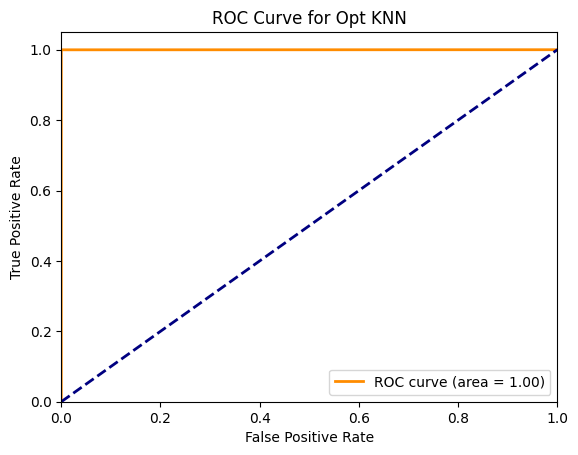

In [70]:
# Compute ROC curve and AUC for optimized knn
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_opt)
knn_roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Opt KNN')
plt.legend(loc="lower right")
plt.show()

In [71]:
# SVM optimization

svm_param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001,0.0001, 'auto']},
]

svm_grid_cv = RandomizedSearchCV(SVC(), param_distributions=svm_param_grid, n_iter=10,scoring='accuracy', random_state=0, cv=5, n_jobs=-1)
svm_grid_cv.fit(X_train, y_train)
print('Best Parameters using Random search: ', svm_grid_cv.best_params_)


Best Parameters using Random search:  {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


In [72]:
# Build the SVM classifier using the optimal parameters detected by the tuning process

svm_opt = svm_grid_cv.best_estimator_

# Fit the optimal model svm_opt to the training set. 
svm_opt.fit(X_train, y_train)

# Predict the test data X_test. Use svm_opt.predict() 
y_pred_svm_opt = svm_opt.predict(X_test)

# Report the final overall accuracy using metrics.accuracy_score(). 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_svm_opt))
print(metrics.classification_report(y_test, y_pred_svm_opt))

Test set accuracy:  0.856558007818512
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24656
           1       0.74      0.62      0.68      7831

    accuracy                           0.86     32487
   macro avg       0.81      0.78      0.79     32487
weighted avg       0.85      0.86      0.85     32487



In [73]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Optimized SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svm_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svm_opt), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%
0          Benchmark Naive-Bayes     0.61% 0.53%
0                  Optimized KNN     1.00% 1.00%
0                  Optimized SVM     0.86% 0.68%

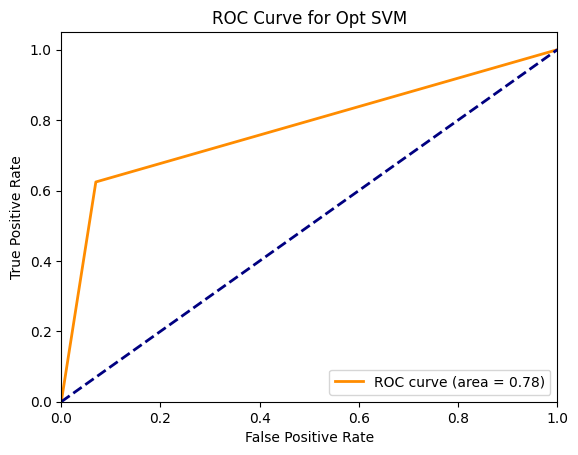

In [74]:
# Compute ROC curve and AUC for optimized SVM
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_opt)
svm_roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Opt SVM')
plt.legend(loc="lower right")
plt.show()

In [75]:
# Random Forests optimization

param_grid_rf = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(1, 50, 2)),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ['gini', 'entropy']
}
cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), 
                           param_distributions=param_grid_rf, 
                           n_iter=30,
                           cv=10,
                           n_jobs=-1,
                           random_state=0)
cv_rf.fit(X_train, y_train)
print('Best Parameters: \n', cv_rf.best_params_)
cv_rf.best_estimator_

Best Parameters: 
 {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 27, 'criterion': 'entropy'}


RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=150, random_state=0)

In [76]:
# Build the RF classifier using the optimal parameters detected by the tuning process.

rf_opt = cv_rf.best_estimator_
rf_opt.fit(X_train, y_train)
y_pred_rf_opt = rf_opt.predict(X_test)
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_rf_opt))
print(metrics.classification_report(y_test, y_pred_rf_opt))

Test set accuracy:  0.8925416320374303
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     24656
           1       0.78      0.77      0.78      7831

    accuracy                           0.89     32487
   macro avg       0.85      0.85      0.85     32487
weighted avg       0.89      0.89      0.89     32487



In [77]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Optimized RF', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rf_opt), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%
0          Benchmark Naive-Bayes     0.61% 0.53%
0                  Optimized KNN     1.00% 1.00%
0                  Optimized SVM     0.86% 0.68%
0                   Optimized RF     0.89% 0.78%

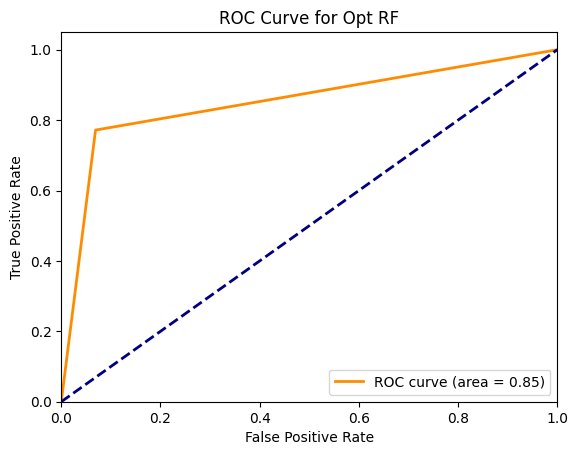

In [78]:
# Compute ROC curve and AUC for optimized RF
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_opt)
rf_roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Opt RF')
plt.legend(loc="lower right")
plt.show()

/var/folders/n7/f5p4_84514bgzwmq25zzpd2m0000gn/T/ipykernel_1609/3659976908.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index, size = 20)


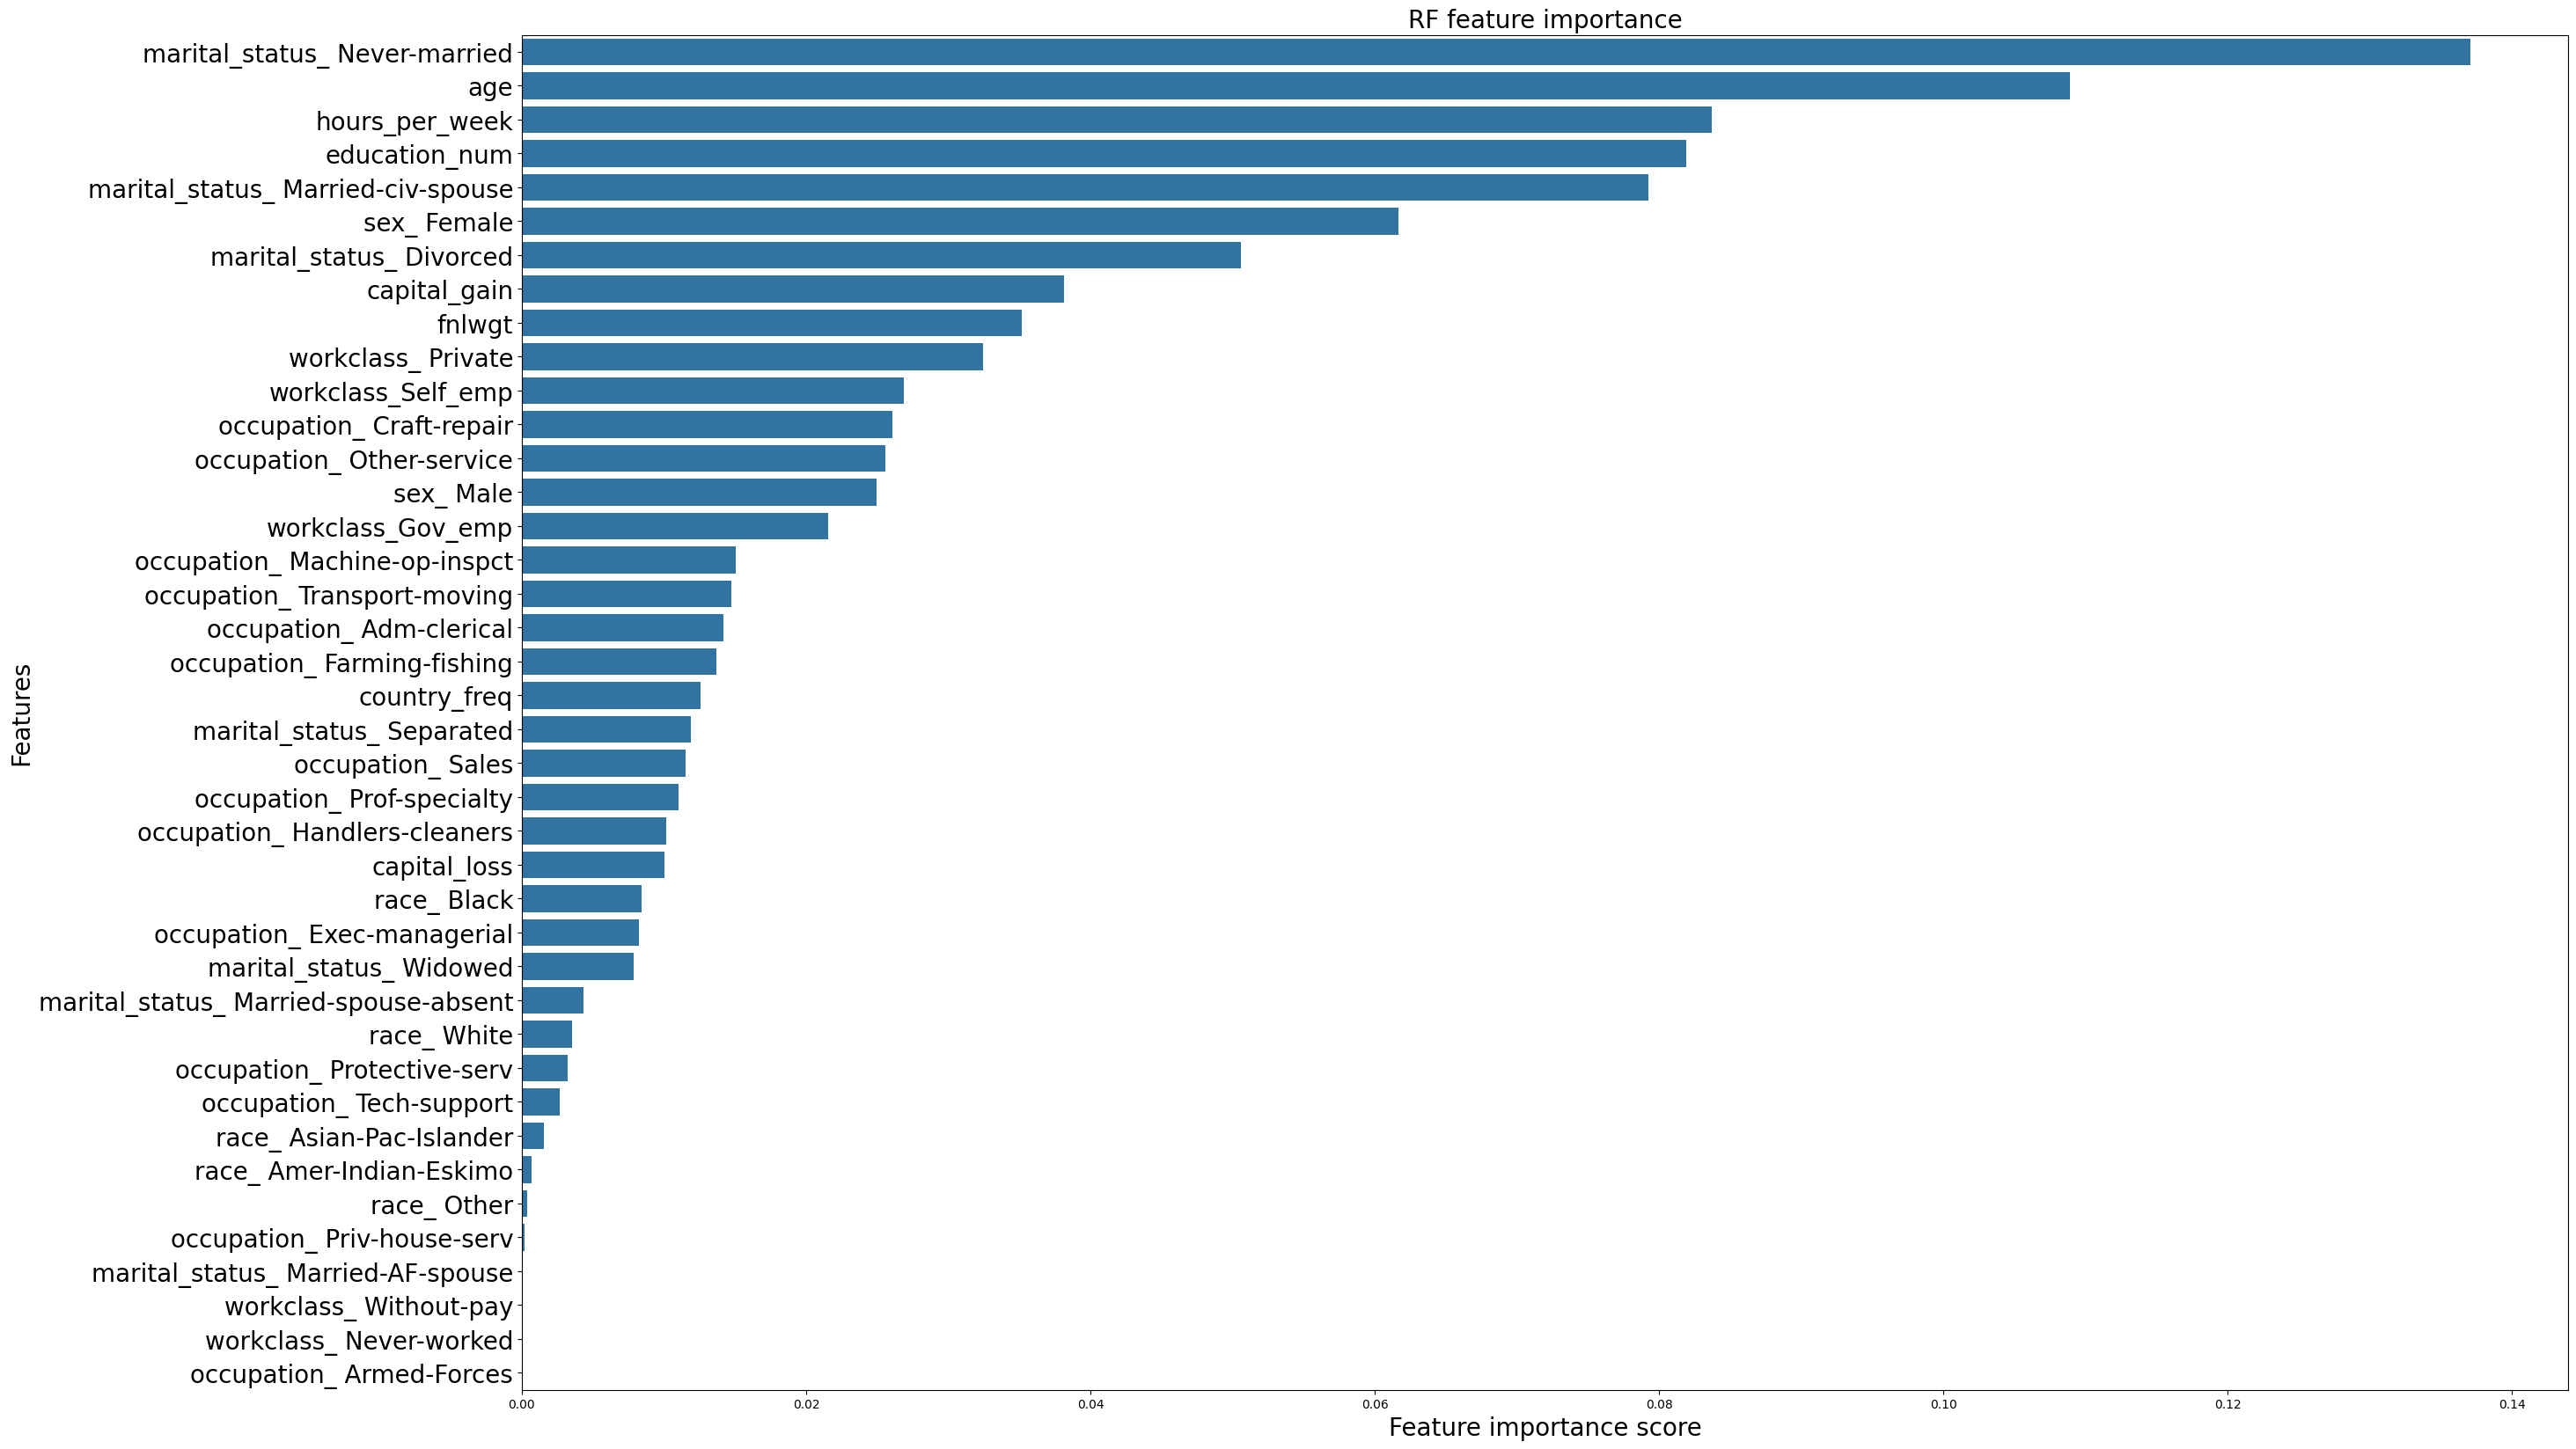

In [79]:
# Get the feature importance from the rf classifier using rf_opt.feature_importances_
# Cast it into a pd.DataFrame and use sort_values to sort by the importance 
# Plot the rf_opt.feature_importances_ in a barplot

feature_scores = pd.DataFrame(rf_opt.feature_importances_, 
                              index=X_train.columns, 
                              columns=['Importance'])

feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 

 
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("RF feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

In [80]:
#Decision Tree optimization

max_depth_values = np.arange(1, 21)
min_samples_split_values = np.arange(2, 21)
min_samples_leaf_values = np.arange(1, 21)

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': max_depth_values,
    'min_samples_split': min_samples_split_values,
    'min_samples_leaf': min_samples_leaf_values,
    'max_features': [None, 'sqrt', 'log2']
}

grid_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_distributions=dt_param_grid, cv=5)
grid_dt.fit(X_train, y_train)

best_criterion = grid_dt.best_params_['criterion']
best_max_depth = grid_dt.best_params_['max_depth']
best_min_samples_split = grid_dt.best_params_['min_samples_split']
best_min_samples_leaf = grid_dt.best_params_['min_samples_leaf']
best_max_features = grid_dt.best_params_['max_features']

print("Best parameters:")
print("criterion =", best_criterion)
print("max_depth =", best_max_depth)
print("min_samples_split =", best_min_samples_split)
print("min_samples_leaf =", best_min_samples_leaf)
print("max_features =", best_max_features)

Best parameters:
criterion = gini
max_depth = 15
min_samples_split = 6
min_samples_leaf = 19
max_features = None


In [81]:
# DT optimal results
dt_opt = DecisionTreeClassifier(criterion=best_criterion, 
                                 max_depth=best_max_depth, 
                                 min_samples_split=best_min_samples_split, 
                                 min_samples_leaf=best_min_samples_leaf, 
                                 max_features=best_max_features)

dt_opt.fit(X_train, y_train)
y_pred_dt_opt = dt_opt.predict(X_test)


print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_dt_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_dt_opt))

Test set accuracy:  0.849

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     24656
           1       0.67      0.72      0.70      7831

    accuracy                           0.85     32487
   macro avg       0.79      0.81      0.80     32487
weighted avg       0.85      0.85      0.85     32487



In [82]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Optimized DT', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_dt_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_dt_opt), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%
0          Benchmark Naive-Bayes     0.61% 0.53%
0                  Optimized KNN     1.00% 1.00%
0                  Optimized SVM     0.86% 0.68%
0                   Optimized RF     0.89% 0.78%
0                   Optimized DT     0.85% 0.70%

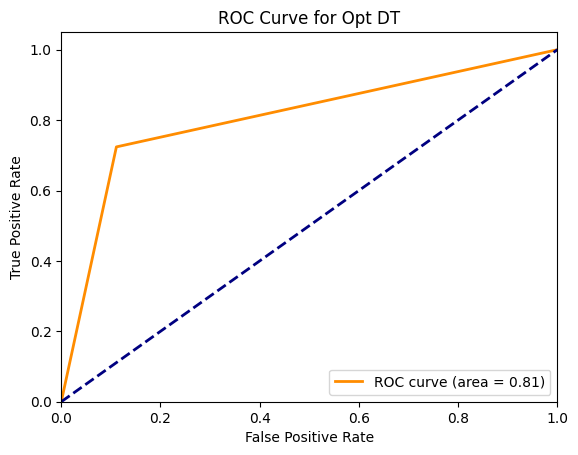

In [83]:
# Compute ROC curve and AUC for optimized dt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_opt)
dt_roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Opt DT')
plt.legend(loc="lower right")
plt.show()

In [84]:
# Gradient Boosting optimization

gb_param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],                # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],          # Subsample ratio of the training instances
    'max_features': ['sqrt', 'log2', None],# The number of features to consider when looking for the best split
    'random_state': [0]                    # Random state for reproducibility
}

gb_grid_cv = RandomizedSearchCV(GradientBoostingClassifier(random_state=0), 
                                param_distributions=gb_param_grid, n_iter=20, scoring='accuracy', cv=10,n_jobs=-1)

gb_grid_cv.fit(X_train, y_train)

print('Best Parametersfor Gradient Boosting: \n', gb_grid_cv.best_params_)
gb_grid_cv.best_estimator_

Best Parametersfor Gradient Boosting: 
 {'subsample': 0.9, 'random_state': 0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.2}


GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           random_state=0, subsample=0.9)

In [85]:
# Build the GB classifier using the optimal parameters detected by the tuning process.

gb_opt = gb_grid_cv.best_estimator_
gb_opt.fit(X_train, y_train)
y_pred_gb_opt = gb_opt.predict(X_test)
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_gb_opt))
print(metrics.classification_report(y_test, y_pred_gb_opt))

Test set accuracy:  0.8814602764182596
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     24656
           1       0.77      0.73      0.75      7831

    accuracy                           0.88     32487
   macro avg       0.84      0.83      0.83     32487
weighted avg       0.88      0.88      0.88     32487



In [86]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Optimized GB', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_gb_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_gb_opt), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%
0          Benchmark Naive-Bayes     0.61% 0.53%
0                  Optimized KNN     1.00% 1.00%
0                  Optimized SVM     0.86% 0.68%
0                   Optimized RF     0.89% 0.78%
0                   Optimized DT     0.85% 0.70%
0                   Optimized GB     0.88% 0.75%

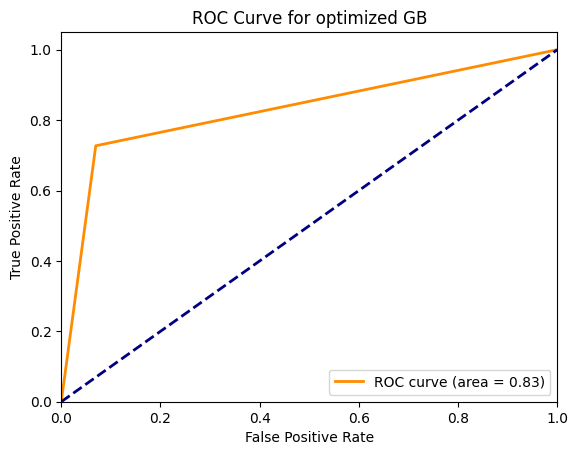

In [87]:
# Compute ROC curve and AUC for Optimized Gradient Boosting 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_opt)
gb_roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for optimized GB')
plt.legend(loc="lower right")
plt.show()

In [88]:
#Naive Bayes optimization with Gaussian NB 

#Gausian Naive Bayes doesnt have parameters to tune so we can iniate the classifier

Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

y_pred_Gnb = Gnb.predict(X_test)
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_Gnb))
print(metrics.classification_report(y_test, y_pred_Gnb))


Test set accuracy:  0.6105826946163081
              precision    recall  f1-score   support

           0       0.94      0.52      0.67     24656
           1       0.37      0.90      0.53      7831

    accuracy                           0.61     32487
   macro avg       0.66      0.71      0.60     32487
weighted avg       0.81      0.61      0.63     32487



In [89]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Gaussian NB', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_Gnb), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_Gnb), 3)})])

clf_results

Model  Accuracy    F1
0                  Benchmark KNN     0.88% 0.74%
0              Benchmark RBF SVM     0.86% 0.68%
0           Benchmark Linear SVM     0.85% 0.66%
0        Benchmark Decision Tree     1.00% 1.00%
0       Benchmark Random Forests     1.00% 1.00%
0    Benchmark Gradient Boosting     0.85% 0.70%
0  Benchmark Logistic Regression     0.85% 0.66%
0          Benchmark Naive-Bayes     0.61% 0.53%
0                  Optimized KNN     1.00% 1.00%
0                  Optimized SVM     0.86% 0.68%
0                   Optimized RF     0.89% 0.78%
0                   Optimized DT     0.85% 0.70%
0                   Optimized GB     0.88% 0.75%
0                    Gaussian NB     0.61% 0.53%

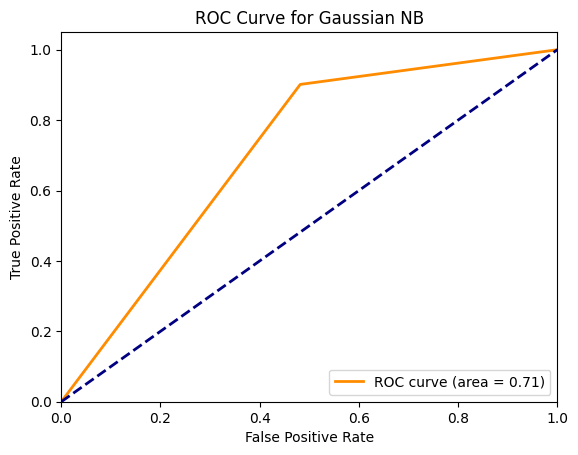

In [90]:
# Compute ROC curve and AUC for Gaussian Naive-Bayes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_Gnb)
gnb_roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian NB')
plt.legend(loc="lower right")
plt.show()

In [91]:
#Optimization for Logistic Regression

lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 1500, 2000,2500,3000,3500,4000,4500,5000,5500]
}

lr_grid_cv = RandomizedSearchCV(LogisticRegression(), param_distributions=lr_params, n_iter=10, scoring='accuracy', random_state=0, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)
print('Best Parameters using Random search: ', lr_grid_cv.best_params_)

lr_grid_cv.best_estimator_

Best Parameters using Random search:  {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 3000, 'C': 1}


LogisticRegression(C=1, max_iter=3000, solver='liblinear')

In [92]:
# Build the Logistic Regression classifier using the optimal parameters detected by the tuning process.

lr_opt = lr_grid_cv.best_estimator_
lr_opt.fit(X_train, y_train)
y_pred_lr_opt = lr_opt.predict(X_test)
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_lr_opt))
print(metrics.classification_report(y_test, y_pred_lr_opt))


Test set accuracy:  0.8479699572136546
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     24656
           1       0.71      0.62      0.66      7831

    accuracy                           0.85     32487
   macro avg       0.80      0.77      0.78     32487
weighted avg       0.84      0.85      0.84     32487



In [93]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Optimized Logistic Regression ', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_opt), 3)})])

clf_results

Model  Accuracy    F1
0                   Benchmark KNN     0.88% 0.74%
0               Benchmark RBF SVM     0.86% 0.68%
0            Benchmark Linear SVM     0.85% 0.66%
0         Benchmark Decision Tree     1.00% 1.00%
0        Benchmark Random Forests     1.00% 1.00%
0     Benchmark Gradient Boosting     0.85% 0.70%
0   Benchmark Logistic Regression     0.85% 0.66%
0           Benchmark Naive-Bayes     0.61% 0.53%
0                   Optimized KNN     1.00% 1.00%
0                   Optimized SVM     0.86% 0.68%
0                    Optimized RF     0.89% 0.78%
0                    Optimized DT     0.85% 0.70%
0                    Optimized GB     0.88% 0.75%
0                     Gaussian NB     0.61% 0.53%
0  Optimized Logistic Regression      0.85% 0.66%

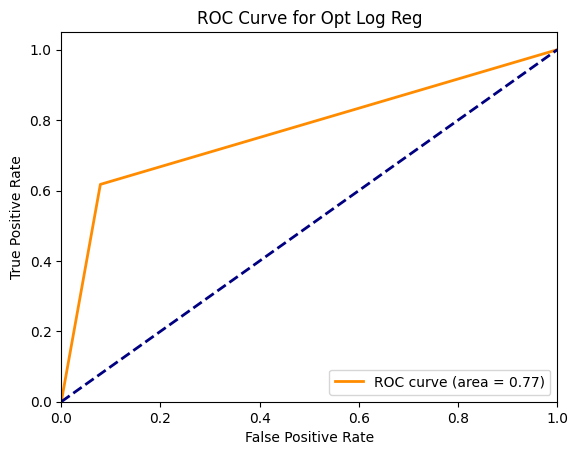

In [94]:
# Compute ROC curve and AUC for optimized logistic regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_opt)
lr_roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Opt Log Reg')
plt.legend(loc="lower right")
plt.show()

In [95]:
clf_results = clf_results.sort_values(by='Accuracy', ascending=False)

print(clf_results)

                            Model  Accuracy    F1
0         Benchmark Decision Tree     1.00% 1.00%
0        Benchmark Random Forests     1.00% 1.00%
0                   Optimized KNN     1.00% 1.00%
0                    Optimized RF     0.89% 0.78%
0                    Optimized GB     0.88% 0.75%
0                   Benchmark KNN     0.88% 0.74%
0               Benchmark RBF SVM     0.86% 0.68%
0                   Optimized SVM     0.86% 0.68%
0            Benchmark Linear SVM     0.85% 0.66%
0                    Optimized DT     0.85% 0.70%
0     Benchmark Gradient Boosting     0.85% 0.70%
0   Benchmark Logistic Regression     0.85% 0.66%
0  Optimized Logistic Regression      0.85% 0.66%
0           Benchmark Naive-Bayes     0.61% 0.53%
0                     Gaussian NB     0.61% 0.53%


In [96]:
# Define the ROC AUC scores
roc_auc_scores = [lr_roc_auc, knn_roc_auc, svm_roc_auc, rf_roc_auc, dt_roc_auc, gnb_roc_auc,gb_roc_auc]

# Create a DataFrame for ROC AUC for optimized models
roc_auc_df = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Gaussian Naive Bayes','Gradient Boosting'],
                   'ROC AUC': roc_auc_scores})

# Sort the DataFrame by ROC AUC scores in descending order
roc_auc_df.sort_values(by='ROC AUC', ascending=False)



Model  ROC AUC
1                   KNN    1.00%
3         Random Forest    0.85%
6     Gradient Boosting    0.83%
4         Decision Tree    0.81%
2                   SVM    0.78%
0   Logistic Regression    0.77%
5  Gaussian Naive Bayes    0.71%

#### Explainable AI (XAI)

In [99]:
# Instantiate LIME explainer
features = X_test.columns.values.tolist()
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features,
                                                  class_names=['<=50k','>50k'], verbose=True, mode='classification')

In [101]:
# Select a specific instance for explanation (j = index )

j = 20

# Explain the prediction for the selected instance using the logistic regression model lr_opt

exp = lime_explainer.explain_instance(X_test.values[j], gb_opt.predict_proba, num_features=10)
exp.show_in_notebook()

Intercept -1.914271219108163
Prediction_local [0.75105123]
Right: 0.8680084727673316


/Users/fotisf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


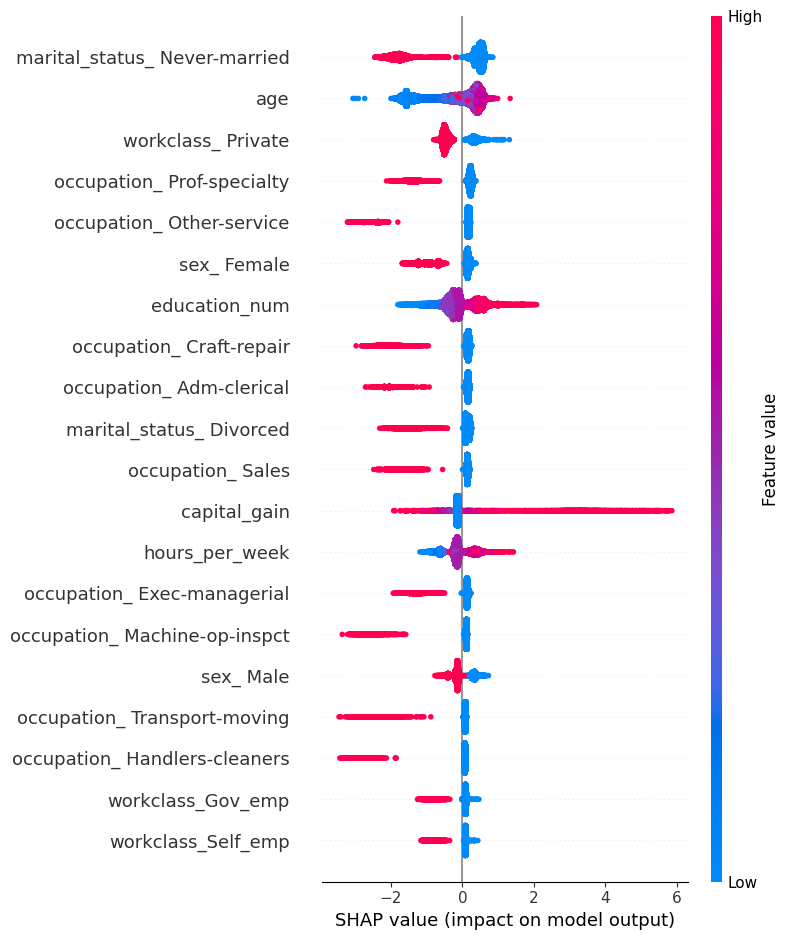

In [102]:
# Instantiate SHAP explainer
shap_explainer = shap.TreeExplainer(gb_opt)
# Compute SHAP values for the entire test set
shap_values = shap_explainer.shap_values(X_test)

# Visualize the summary plot of SHAP values
shap.summary_plot(shap_values, X_test)